In [1]:
pip install yfinance

https://www.infomoney.com.br/


In [23]:
import pandas as pd
import seaborn as sn
import numpy as np
from numpy import linalg as lA
import matplotlib.pyplot as plt
import plotly.express as px
import yfinance as yf

In [24]:
#definindo o simbolo da ação (ticker)
ticker_symbol = "UGPA3.sa"

#coletando os dados históricos de preços de ação (fornece o preço da ação com 15 minutos de delay, para algo mais profissional, APIs pagas)
stock_data = yf.download(ticker_symbol, start='2023-01-01', end='2023-10-26')
stock_data2 = yf.Ticker(ticker_symbol).history(start='2023-01-01', end='2023-10-26')


[*********************100%%**********************]  1 of 1 completed


In [35]:
#limpando dados vazios
cleaned_data = stock_data.copy()
print(cleaned_data.shape)
cleaned_data.dropna(inplace=True)
print(cleaned_data.shape)

(205, 6)
(205, 6)


In [36]:
#limpando dados vazios
cleaned_data2 = stock_data2.copy()
print(cleaned_data2.shape)
cleaned_data2.dropna(inplace=True)
print(cleaned_data2.shape)

(205, 7)
(205, 7)


In [45]:
print(cleaned_data.head())

             Open   High    Low  Close  Adj Close   Volume
Date                                                      
2023-01-02  12.40  12.52  11.85  11.95  11.703218  2973300
2023-01-03  11.91  12.23  11.72  11.76  11.517143  5635500
2023-01-04  11.90  12.31  11.63  12.04  11.791360  8393000
2023-01-05  12.12  12.30  11.80  12.20  11.948056  8176200
2023-01-06  12.20  12.48  12.11  12.34  12.085165  4599500


In [38]:
print(cleaned_data2.head())

                                Open       High        Low      Close  \
Date                                                                    
2023-01-02 00:00:00-03:00  12.143925  12.261448  11.605284  11.703218   
2023-01-03 00:00:00-03:00  11.664045  11.977437  11.477969  11.517143   
2023-01-04 00:00:00-03:00  11.654251  12.055785  11.389827  11.791360   
2023-01-05 00:00:00-03:00  11.869708  12.045991  11.556317  11.948056   
2023-01-06 00:00:00-03:00  11.948056  12.222273  11.859914  12.085165   

                            Volume  Dividends  Stock Splits  
Date                                                         
2023-01-02 00:00:00-03:00  2973300        0.0           0.0  
2023-01-03 00:00:00-03:00  5635500        0.0           0.0  
2023-01-04 00:00:00-03:00  8393000        0.0           0.0  
2023-01-05 00:00:00-03:00  8176200        0.0           0.0  
2023-01-06 00:00:00-03:00  4599500        0.0           0.0  


In [46]:
cleaned_data['Daily_Return'] = cleaned_data['Adj Close'].pct_change()

In [55]:
print(cleaned_data['Daily_Return'].head())

Date
2023-01-02         NaN
2023-01-03   -0.015899
2023-01-04    0.023809
2023-01-05    0.013289
2023-01-06    0.011475
Name: Daily_Return, dtype: float64


In [51]:
cleaned_data['Daily_Return'].mean()

0.0028494679146370784

In [53]:
cleaned_data['Daily_Return'].describe()

count    204.000000
mean       0.002849
std        0.019052
min       -0.040816
25%       -0.008154
50%        0.000711
75%        0.012876
max        0.118094
Name: Daily_Return, dtype: float64

In [65]:
import plotly.express as px

fig = px.line(cleaned_data, x=cleaned_data.index, y="Adj Close", title = 'Preço de Fechamento Ajustado da Ação UGPA3')
fig.show()

In [61]:
#calculando o retorno diario acumulado
cleaned_data['Cumulative_Return'] = (1 + cleaned_data['Adj Close'].pct_change()).cumprod()

fig = px.line(cleaned_data, x=cleaned_data.index, y='Cumulative_Return', title='Retorno Acumulativo')

fig.show()

In [73]:
import yfinance as yf
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

acao = 'PETR4.SA'

#coletando os dados historios do indice IBOV e da acao
data = yf.download(['^BVSP' ,acao], start='2023-01-01', end='2023-08-01')['Adj Close']



[*********************100%%**********************]  2 of 2 completed


In [74]:
data.dropna(inplace=True)

ibov_returns = data['^BVSP'].pct_change().dropna()
acao_returns = data['PETR4.SA'].pct_change().dropna()

#ajustando
linear_regressor = LinearRegression()
reg = linear_regressor.fit(ibov_returns.values.reshape(-1, 1), acao_returns.values.reshape(-1, 1))

#predict y values from line found
ibov_returns_pred = linear_regressor.predict(ibov_returns.values.reshape(-1, 1))

#valor da correlação entre o indice do mercado de ação com a ação
print((reg.coef_[0][0]))

1.1335598764331671


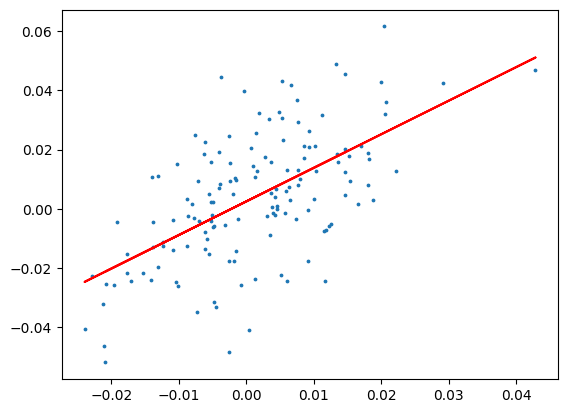

In [76]:
#plot scatter along with regression
plt.scatter(ibov_returns, acao_returns, s=3)
plt.plot(ibov_returns, ibov_returns_pred, color='red')
plt.show()

In [80]:
import numpy as np

#parametros do CAPM
risk_free_rate = 0.1325 #taxa livre de risco (selic)
market_return = ibov_returns.mean() * 252 # retorno esperado do mercado por ano(dias de funcionamento do mercado)

print("Retorno medio anualizado do IBOV")
print(market_return)

beta = 1.13 #beta ativo
beta = reg.coef_[0][0]
# calculo do retorno esperado do CAPM
expected_return = risk_free_rate + beta * (market_return - risk_free_rate)

print("retorno esperado pelo CAPM")
print(expected_return)

Retorno medio anualizado do IBOV
0.25567726197790874
retorno esperado pelo CAPM
0.2721288018670541


In [81]:
#analise de risco de gestão de portfolio

#coletando os dados historicos de precos da ação
ibov = yf.download('^BVSP', start='2023-01-01', end='2023-10-24')


[*********************100%%**********************]  1 of 1 completed


In [82]:
ibov["Returns"] = ibov['Adj Close'].pct_change()

In [83]:
print(ibov.head())

                Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
2023-01-02  109734.0  109734.0  105981.0  106376.0   106376.0   8130500   
2023-01-03  106377.0  106684.0  103852.0  104166.0   104166.0  14466700   
2023-01-04  104167.0  105627.0  103915.0  105334.0   105334.0  14451200   
2023-01-05  105336.0  107743.0  105333.0  107518.0   107518.0  15512000   
2023-01-06  107642.0  109433.0  107642.0  108836.0   108836.0  12626600   

             Returns  
Date                  
2023-01-02       NaN  
2023-01-03 -0.020775  
2023-01-04  0.011213  
2023-01-05  0.020734  
2023-01-06  0.012258  


In [84]:
#get the list of all returns, excluding the first value which is NaN
returns_list = ibov["Returns"].to_list()[1:]

mean = np.mean(returns_list)
std_dev = np.std(returns_list)

print(mean)
print(std_dev)

0.0003487570158567778
0.010883247033038092


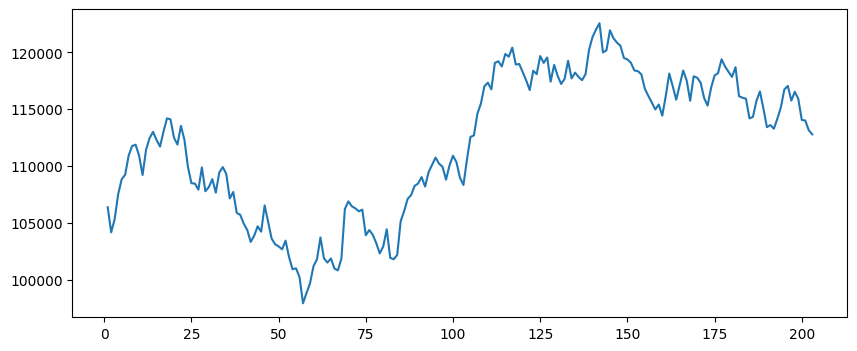

In [86]:
#genearte list with all closes in the current year and the corresponding trading day
closes_list = ibov["Adj Close"].to_list()
days = [i for i in range(1, len(ibov['Adj Close']) + 1)]


#plot closing prices
fig = plt.figure(figsize=(10,4))
plt.plot(days, closes_list)

In [87]:
fig = px.line(x=days, y=closes_list)
fig.
fig.show()

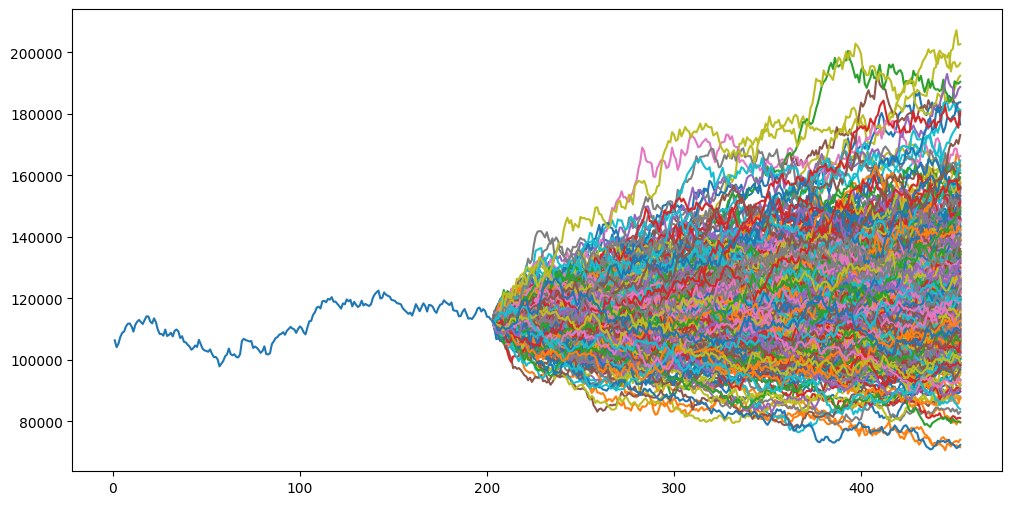

In [95]:
from scipy.stats import norm
from random import random

#plot closees again
fig = plt.figure(figsize=(12,6))
plt.plot(days, closes_list)


#Criando uma simulação de monte carlo (existe bibliotecas que já vem implementadas)

#number of simulations
simulations = 400

all_synthetic_closes = []

trading_days = 250

last_close = ibov['Close'][-1]

#generate synthetic trading days
num_days = [days[-1]]
for i in range(trading_days):
  num_days.append(num_days[-1] + 1)

for i in range(simulations):
  closes = [last_close]

  #gemerate sunthetic closes
  for j in range(trading_days):
    pct_change = norm.ppf(random(), loc=mean, scale=std_dev)
    synthetic_close = closes[-1] * (1 + pct_change)
    closes.append(synthetic_close)

  last_synthetic_close = closes[-1]
  all_synthetic_closes.append(last_synthetic_close)

  plt.plot(num_days, closes)


In [96]:
# VAR

confidence = 95
var = np.percentile(all_synthetic_closes, 100 - confidence)

print("var")
print(round(var, 2))
print("confidence")
print(confidence)

var
91857.31
confidence
95


In [97]:
# VAR outra forma

alpha = 0.05 # if 0.05 we are using: 1

var = norm.ppf(alpha, mean, std_dev)
print(var)

-0.01755259133944478


In [99]:
capital = 100000
max_losses = var*capital

print("We have")
print(1-alpha)

print("confidence that portifolio of:")
print(capital)

print("will not exceed losses greater than:")
print(max_losses)

We have
0.95
confidence that portifolio of:
100000
will not exceed losses greater than:
-1755.259133944478


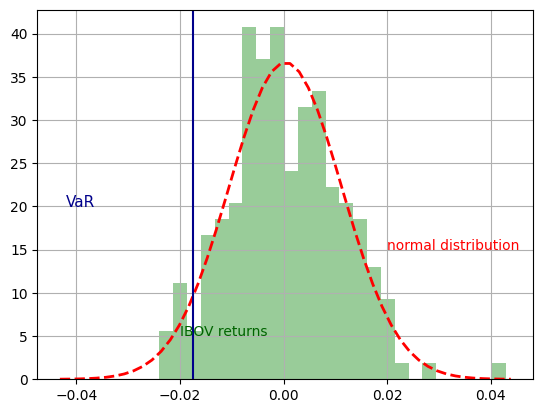

In [103]:
#plot the histogram of the portfolio returns
ibov["Returns"].hist(bins=25, density=True, histtype='stepfilled', alpha=0.4, color='green')

#plot a theoretical normal distribution based on portfolion returns statistics
x = np.linspace((mean - 4*std_dev), (mean + 4*std_dev), 50)
plt.plot(x, norm.pdf(x, mean, std_dev), 'r--', lw = 2)

#add var value as a vertical line
plt.axvline(x=var, color = 'darkblue')

#add text to plot
plt.text(0.02, 15, 'normal distribution', fontsize=10, color='red')
plt.text(-0.02, 5, 'IBOV returns', fontsize=10, color='darkgreen')
plt.text(-0.042, 20, 'VaR', fontsize=11, color='darkblue')

plt.show()


In [107]:
#generate breakeven risk free line
projected_risk_free = 0.1325
# projected_risk_free = 0.1275
breakeven_close = last_close * (1 + projected_risk_free)
print(round(breakeven_close, 2))

above_breakeven = [close for close in all_synthetic_closes if close > breakeven_close]
pct_above_breakeven = len(above_breakeven) / len(all_synthetic_closes)
print(pct_above_breakeven)

127729.01
0.3575
